# Telco IBM Churn Dataset using 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from time import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.layers import *
from keras.models import Sequential
from sklearn.feature_selection import RFE, SelectKBest,chi2

In [2]:
df = pd.read_excel('./Telco_customer_churn.xlsx')
df.head(2)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved


## Data Preprocessing

In [3]:
df.shape

(7043, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Handling irrelevant features

In [5]:
df.drop(columns=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Churn Reason'], inplace=True, index=1)

In [6]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340
5,34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,...,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925


### Handling Null values

In [7]:
df.isnull().sum()

Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

### Handling duplicate values

In [8]:
df.duplicated().sum()

0

### Handling Categorical Features

In [9]:
categorical_features = [features for features in df.columns if df[features].dtypes== 'O']

In [10]:
categorical_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label']

In [11]:
for i in categorical_features:
    print(i,df[i].unique())

Gender ['Male' 'Female']
Senior Citizen ['No' 'Yes']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
Phone Service ['Yes' 'No']
Multiple Lines ['No' 'Yes' 'No phone service']
Internet Service ['DSL' 'Fiber optic' 'No']
Online Security ['Yes' 'No' 'No internet service']
Online Backup ['Yes' 'No' 'No internet service']
Device Protection ['No' 'Yes' 'No internet service']
Tech Support ['No' 'Yes' 'No internet service']
Streaming TV ['No' 'Yes' 'No internet service']
Streaming Movies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'Two year' 'One year']
Paperless Billing ['Yes' 'No']
Payment Method ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Total Charges [108.15 820.5 3046.05 ... 7362.9 346.45 6844.5]
Churn Label ['Yes' 'No']


In [12]:
## here Total charges is not a categorical feature

In [13]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce').fillna(0)

In [14]:
categorical_features = [features for features in df.columns if df[features].dtypes== 'O']
categorical_features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label']

In [15]:
le = LabelEncoder()
for i in categorical_features:
    df[i] = le.fit_transform(df[i])

In [16]:
categorical_features = [features for features in df.columns if df[features].dtypes== 'O']
categorical_features

[]

In [17]:
df.dtypes

Latitude             float64
Longitude            float64
Gender                 int32
Senior Citizen         int32
Partner                int32
Dependents             int32
Tenure Months          int64
Phone Service          int32
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int32
Payment Method         int32
Monthly Charges      float64
Total Charges        float64
Churn Label            int32
Churn Value            int64
Churn Score            int64
CLTV                   int64
dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


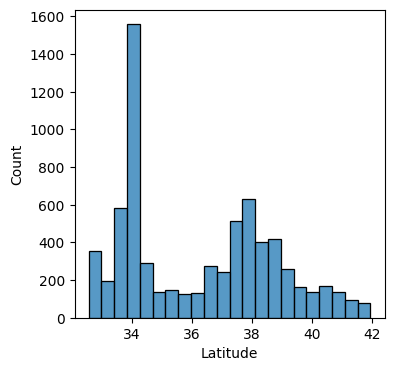

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


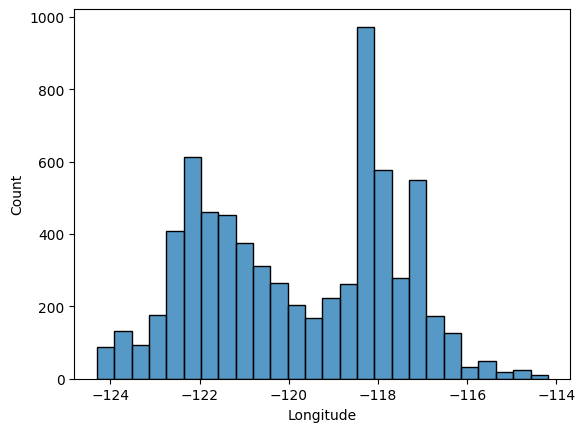

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


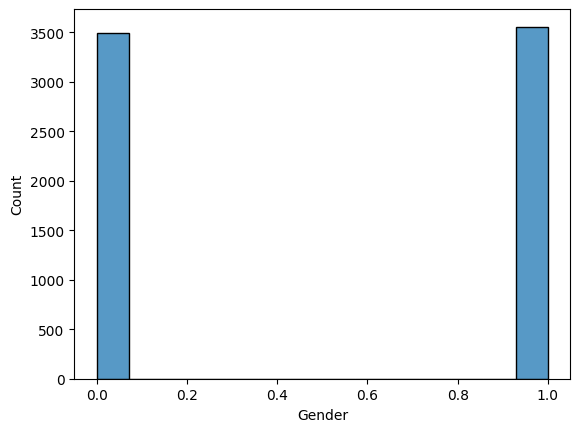

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


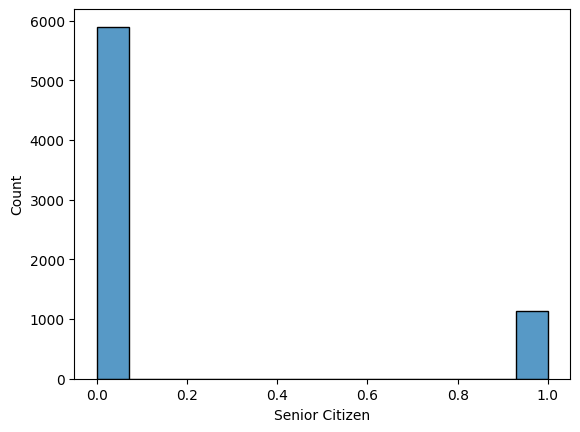

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


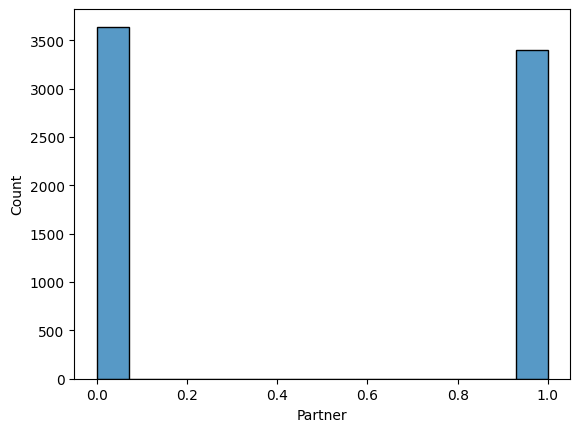

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


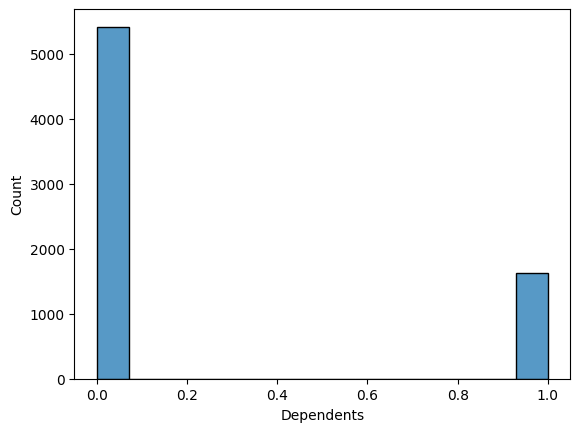

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


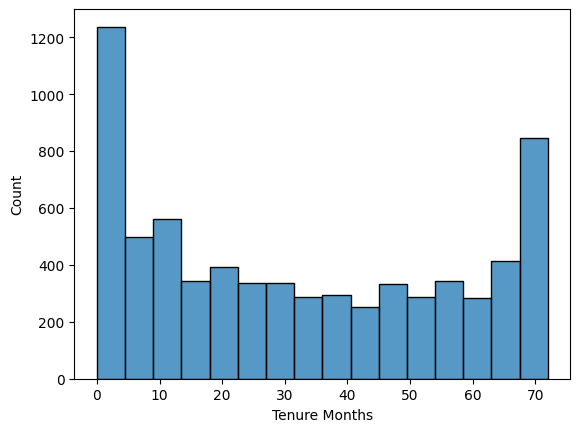

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


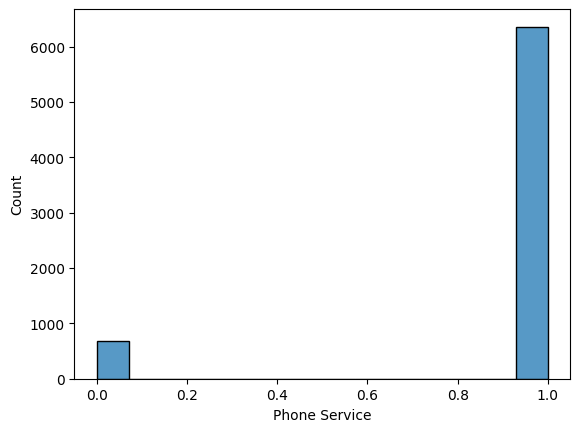

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


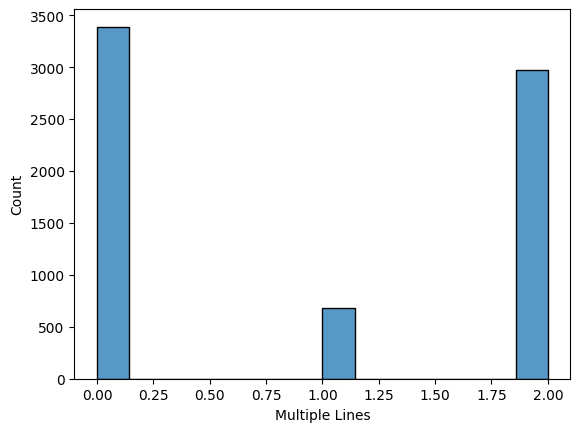

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


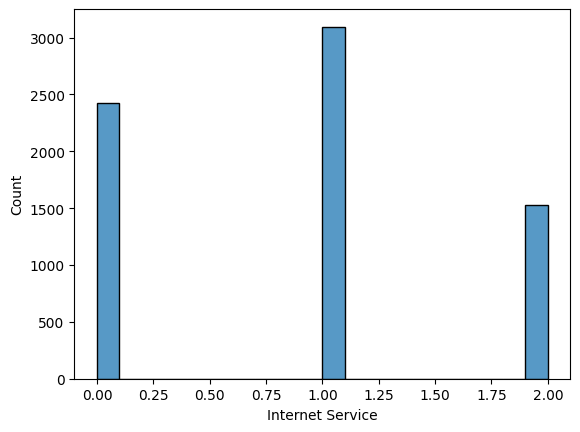

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


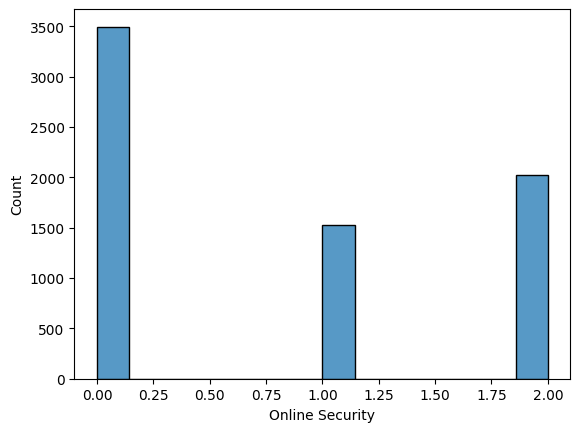

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


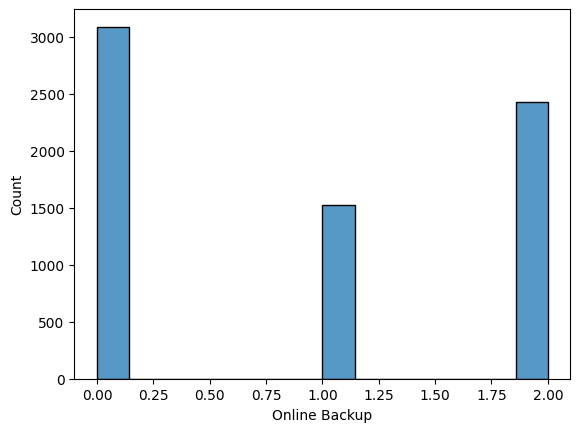

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


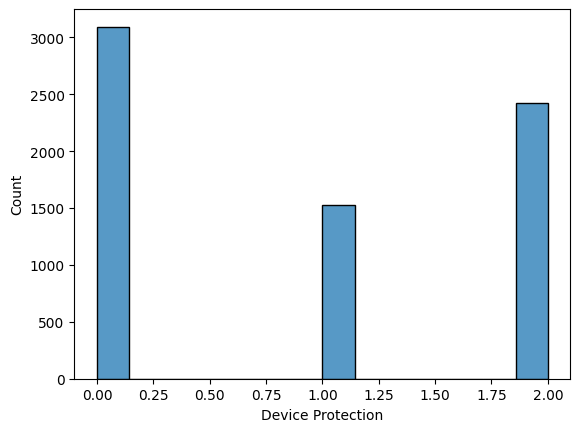

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


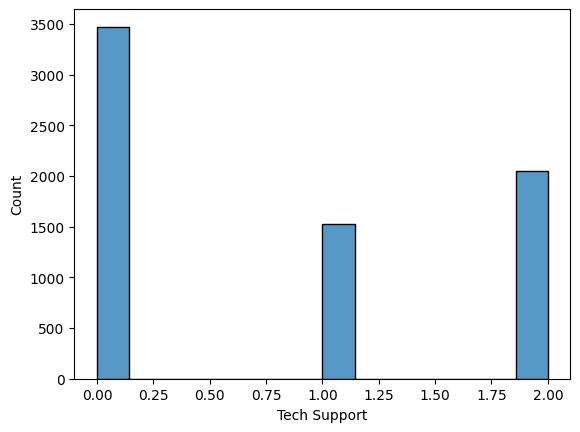

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


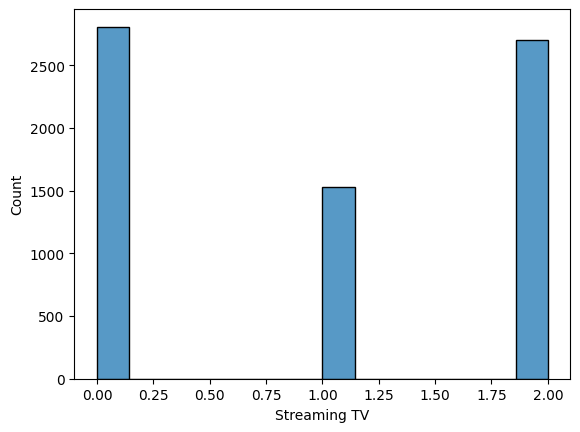

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


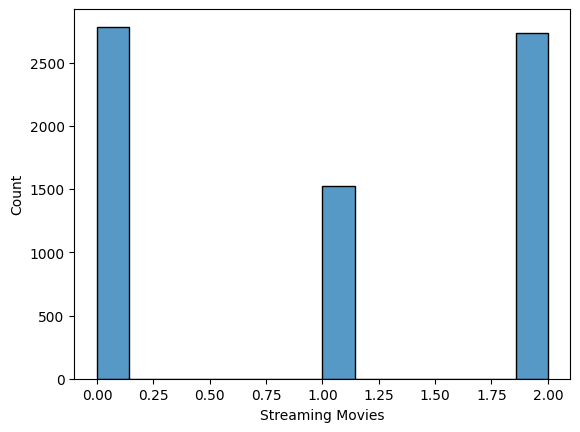

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


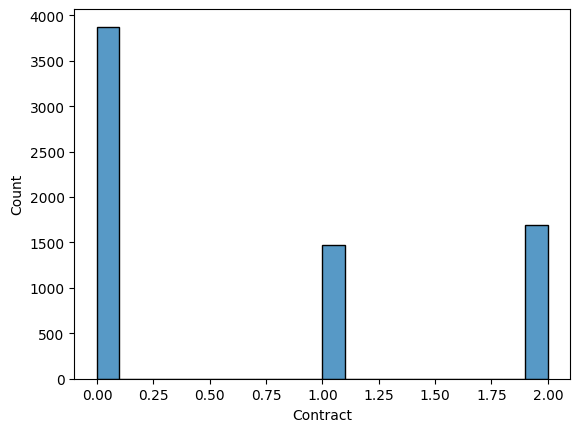

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


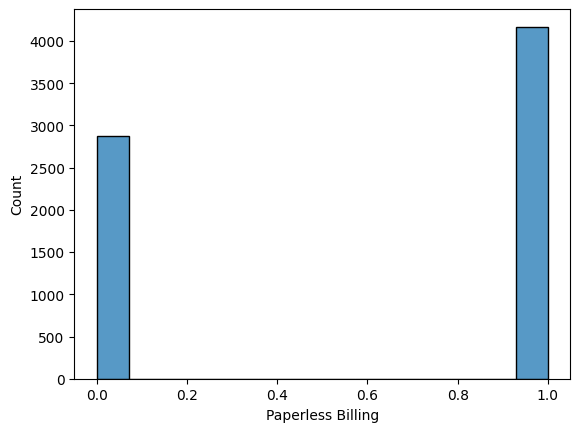

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


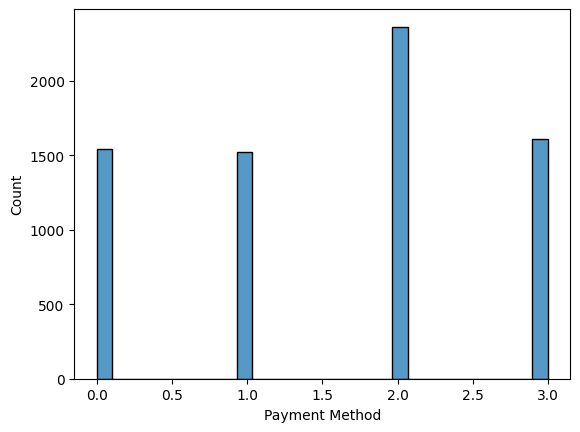

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


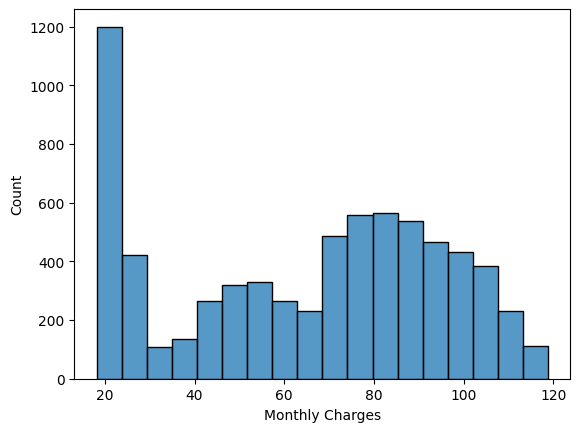

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


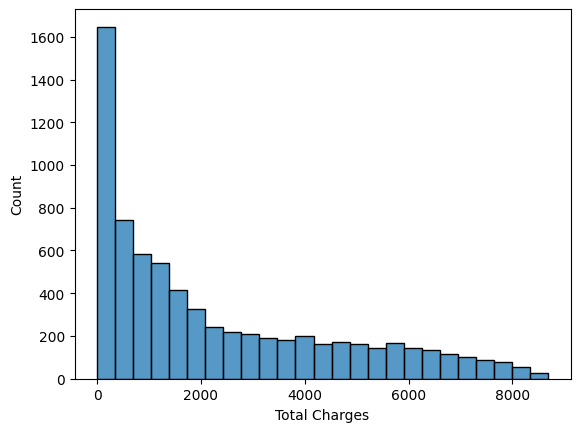

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


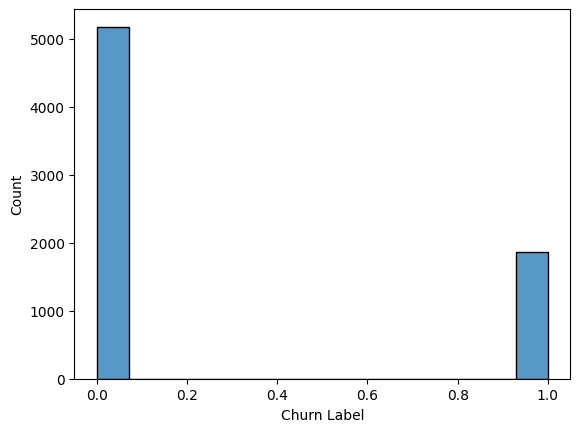

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


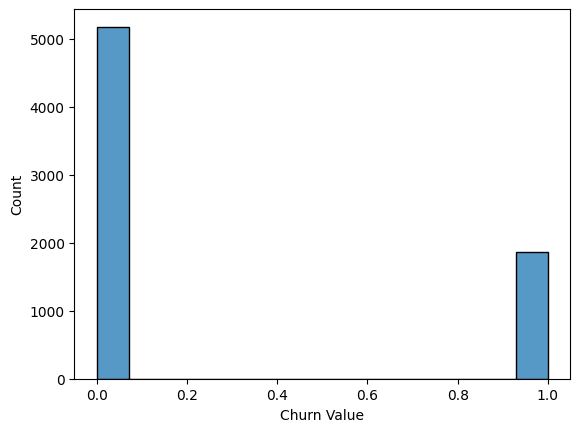

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


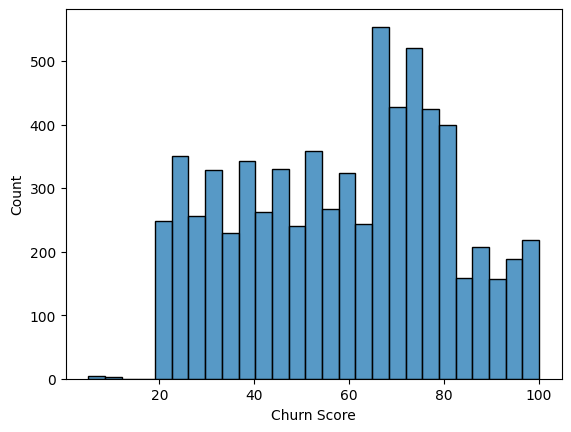

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


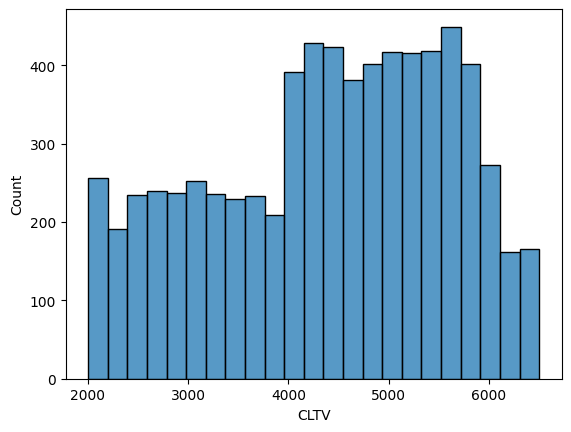

In [18]:
plt.figure(figsize=(4,4))
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

## Feature Engineering

In [19]:
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,random_state=42,train_size=0.5)

In [20]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_val_s = scaler.transform(X_val)

In [21]:
def plot_history(history):
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

In [22]:
df.shape

(7042, 25)

In [23]:
model = Sequential()
input = Input(shape=(24,))
model.add(input)
model.add(Dense(24, activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,013 (3.96 KB)

 Trainable params: 1,013 (3.96 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [26]:
callbacks = myCallback()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_s,y_train,epochs=50,batch_size=32, validation_data=(X_val_s, y_val), callbacks=callbacks)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4703 - loss: 0.7168 - val_accuracy: 0.9319 - val_loss: 0.3014
Epoch 2/50
138/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1778
Reached 99% accuracy so cancelling training!
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1684 - val_accuracy: 0.9991 - val_loss: 0.0155


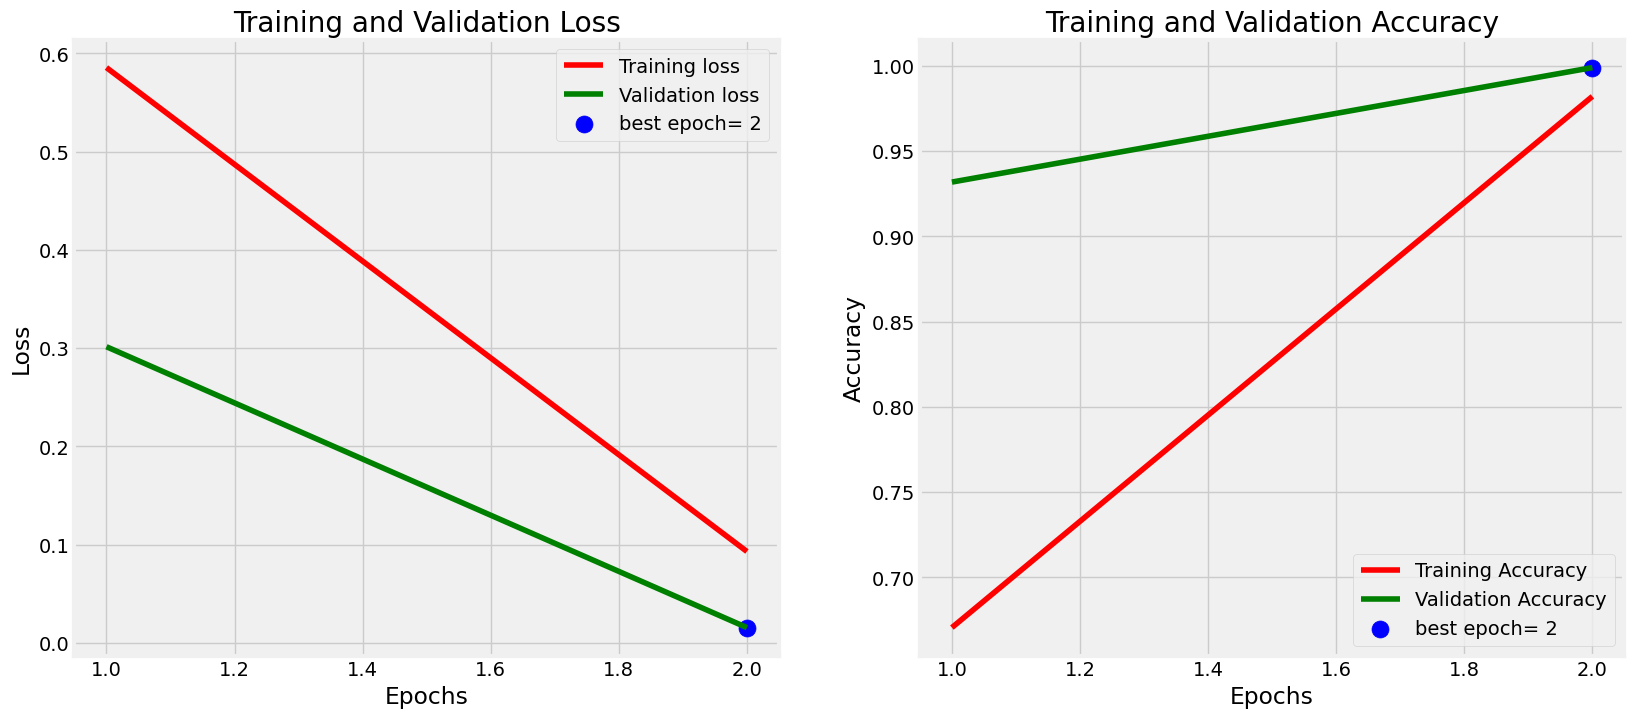

In [27]:
plot_history(history)

In [28]:
y_pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
print("Accuracy: ",np.round(accuracy_score(y_test,y_pred)*100))

Accuracy:  71.0


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       752
           1       0.00      0.00      0.00       304

    accuracy                           0.71      1056
   macro avg       0.36      0.50      0.42      1056
weighted avg       0.51      0.71      0.59      1056



C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

<Axes: >

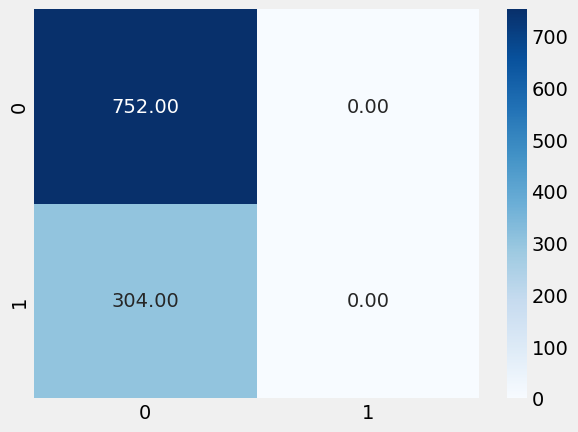

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred) , cmap='Blues', fmt='0.2f', annot=True)

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X, y.ravel())

X_train, X_test,y_train,y_test = train_test_split(X_res,y_res,random_state=42,train_size=0.7)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,random_state=42,train_size=0.5)

In [33]:
callbacks = myCallback()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50,batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5925 - loss: 198.9814 - val_accuracy: 0.7991 - val_loss: 10.1013
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8156 - loss: 5.4951 - val_accuracy: 0.8268 - val_loss: 3.0143
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8709 - loss: 2.0283 - val_accuracy: 0.9079 - val_loss: 1.1143
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8915 - loss: 1.2566 - val_accuracy: 0.9375 - val_loss: 0.5295
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8958 - loss: 1.1928 - val_accuracy: 0.8661 - val_loss: 1.1062
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9109 - loss: 0.9542 - val_accuracy: 0.9163 - val_loss: 0.7111
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8921 - loss: 1.2395 - val_accuracy: 0.9408 - val_loss: 0.4863
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9132 - loss: 0.7679 - val_accuracy:

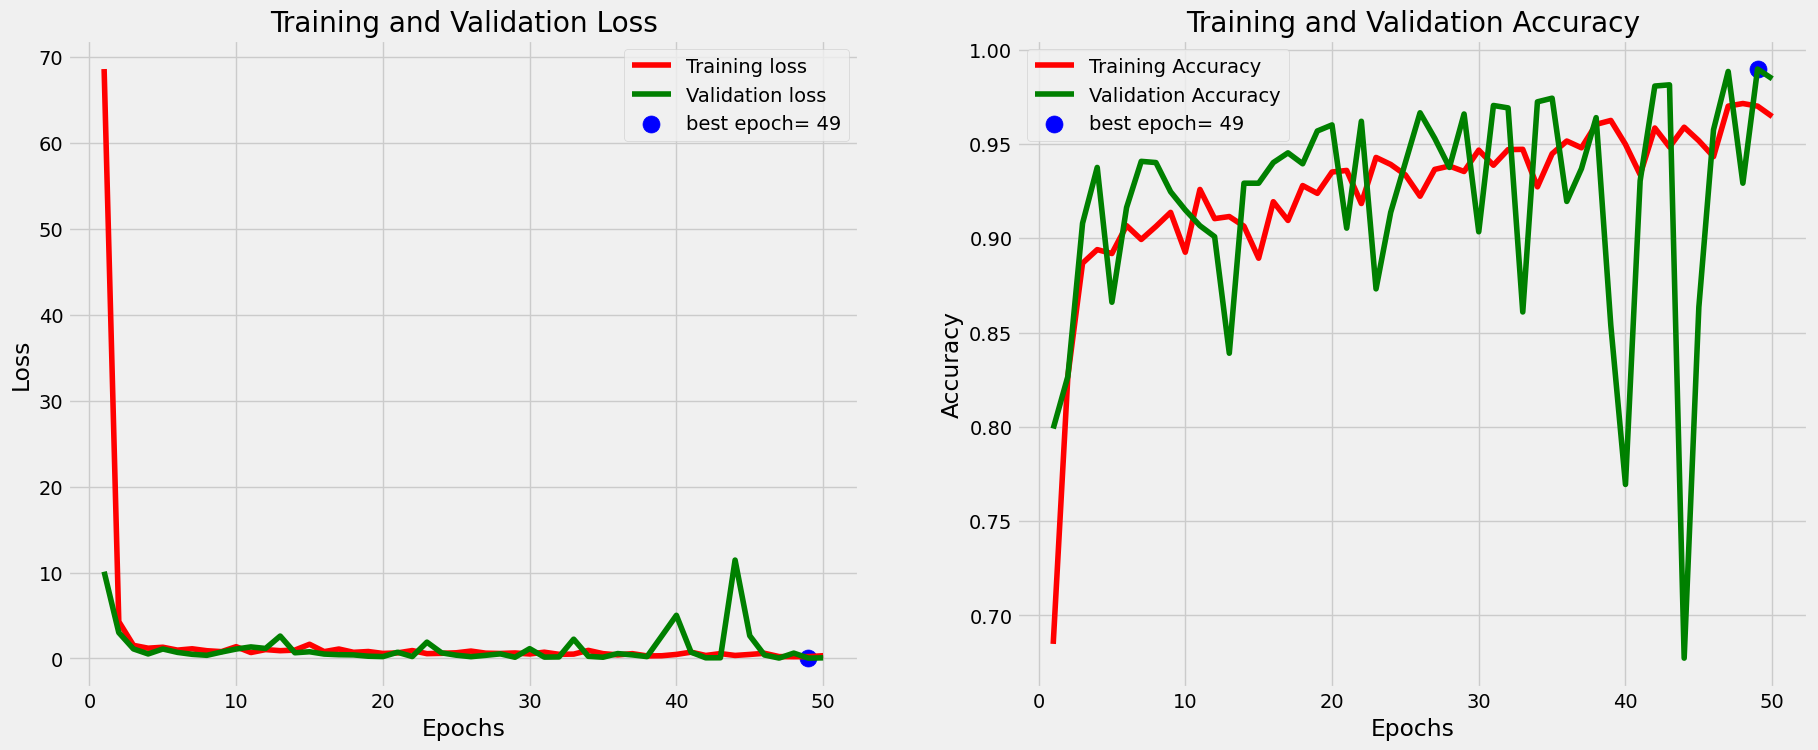

In [34]:
plot_history(history)

In [35]:
y_pred = model.predict(X_test)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [36]:
y_pred = np.round(y_pred)
print("Accuracy: ",np.round(accuracy_score(y_test,y_pred)*100))

Accuracy:  99.0


In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       791
           1       1.00      0.98      0.99       761

    accuracy                           0.99      1552
   macro avg       0.99      0.99      0.99      1552
weighted avg       0.99      0.99      0.99      1552



<Axes: >

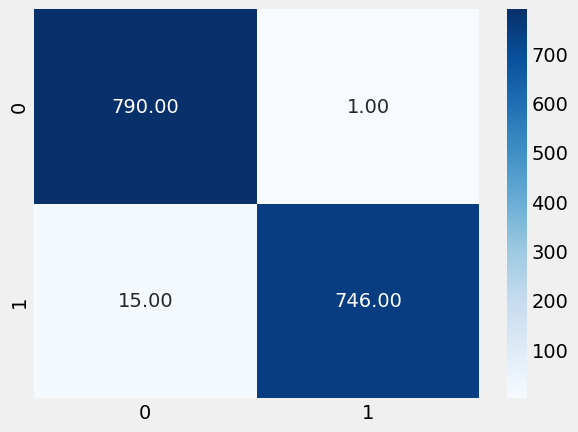

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred) , cmap='Blues', fmt='0.2f', annot=True)

In [39]:
import pickle
pickle.dump(model,open("IBMwithSmote.pkl",'wb'))

In [40]:
model1 = pickle.load(open("IBMwithSmote.pkl","rb"))

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
df.drop('Churn Label',axis=1,inplace=True)

In [61]:
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [62]:
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

In [63]:
bestfeatures = SelectKBest(score_func=chi2, k=23)
fit = bestfeatures.fit(X_sc,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Latitude,0.012182
1,Longitude,0.014149
2,Gender,0.244628
3,Senior Citizen,134.570504
4,Partner,82.182704
5,Dependents,336.016293
6,Tenure Months,225.779875
7,Phone Service,0.096044
8,Multiple Lines,4.934920
9,Internet Service,4.921006


In [110]:
featureScores.nlargest(23,'Score')['Specs']

16             Contract
5            Dependents
21          Churn Score
10      Online Security
13         Tech Support
6         Tenure Months
3        Senior Citizen
11        Online Backup
17    Paperless Billing
12    Device Protection
4               Partner
20        Total Charges
19      Monthly Charges
18       Payment Method
22                 CLTV
8        Multiple Lines
9      Internet Service
15     Streaming Movies
14         Streaming TV
2                Gender
7         Phone Service
1             Longitude
0              Latitude
Name: Specs, dtype: object

In [65]:
featureScores.nlargest(18,'Score')['Specs']

16             Contract
5            Dependents
21          Churn Score
10      Online Security
13         Tech Support
6         Tenure Months
3        Senior Citizen
11        Online Backup
17    Paperless Billing
12    Device Protection
4               Partner
20        Total Charges
19      Monthly Charges
18       Payment Method
22                 CLTV
8        Multiple Lines
9      Internet Service
15     Streaming Movies
Name: Specs, dtype: object

In [67]:
featureScores.nlargest(15,'Score')['Specs']

16             Contract
5            Dependents
21          Churn Score
10      Online Security
13         Tech Support
6         Tenure Months
3        Senior Citizen
11        Online Backup
17    Paperless Billing
12    Device Protection
4               Partner
20        Total Charges
19      Monthly Charges
18       Payment Method
22                 CLTV
Name: Specs, dtype: object

In [68]:
featureScores.nlargest(12,'Score')['Specs']

16             Contract
5            Dependents
21          Churn Score
10      Online Security
13         Tech Support
6         Tenure Months
3        Senior Citizen
11        Online Backup
17    Paperless Billing
12    Device Protection
4               Partner
20        Total Charges
Name: Specs, dtype: object

In [69]:
featureScores.nlargest(9,'Score')['Specs']

16             Contract
5            Dependents
21          Churn Score
10      Online Security
13         Tech Support
6         Tenure Months
3        Senior Citizen
11        Online Backup
17    Paperless Billing
Name: Specs, dtype: object

In [70]:
featureScores.nlargest(6,'Score')['Specs']

16           Contract
5          Dependents
21        Churn Score
10    Online Security
13       Tech Support
6       Tenure Months
Name: Specs, dtype: object

In [71]:
featureScores.nlargest(3,'Score')['Specs']

16       Contract
5      Dependents
21    Churn Score
Name: Specs, dtype: object

In [72]:
featureScores.nlargest(2,'Score')['Specs']

16      Contract
5     Dependents
Name: Specs, dtype: object

In [97]:
def evaluate_model2(X_train,y_train,X_test,y_test,X_val,y_val,n):
    st = time()
    model = Sequential()
    input = Input(shape=(n,))
    model.add(input)
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train,y_train,epochs=50,batch_size=32, validation_data=(X_val, y_val))
    et = time()
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    ac = np.round(accuracy_score(y_test,y_pred)*100,2)
    print(f"Accuracy: {ac}%")
    t = et-st
    print(f"Training Time: {t} Seconds")
    print(classification_report(y_test,y_pred))
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues',fmt='0.2f')
    plt.show()
    return model,history,ac,t

In [98]:
def feature_selection2(n_features,df):
    y = df['Churn Value']
    X = df[featureScores.nlargest(n_features,'Score')['Specs']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, train_size=0.5) 
    evaluate_model2(X_train,y_train,X_test,y_test,X_val, y_val, n = n_features)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4901 - loss: 172.5780 - val_accuracy: 0.7304 - val_loss: 1.2290
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6819 - loss: 0.9542 - val_accuracy: 0.7956 - val_loss: 0.5266
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7594 - loss: 0.5687 - val_accuracy: 0.3623 - val_loss: 1.7511
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7385 - loss: 0.7336 - val_accuracy: 0.7427 - val_loss: 0.8895
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.5679 - val_accuracy: 0.8070 - val_loss: 0.4721
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7817 - loss: 0.6174 - val_accuracy: 0.8534 - val_loss: 0.4335
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.5624 - val_accuracy: 0.8089 - val_loss: 0.4086
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7844 - loss: 0.6588 - val_accuracy: 

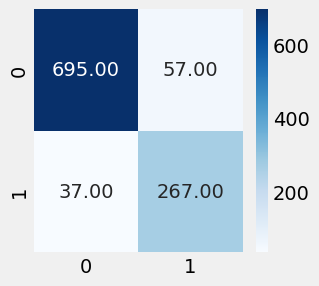

In [99]:
feature_selection2(23,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6190 - loss: 3.9745 - val_accuracy: 0.7294 - val_loss: 1.3153
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7046 - loss: 0.7419 - val_accuracy: 0.7323 - val_loss: 1.0995
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7269 - loss: 0.8015 - val_accuracy: 0.7606 - val_loss: 0.6850
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7449 - loss: 0.6518 - val_accuracy: 0.8108 - val_loss: 0.4336
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.5678 - val_accuracy: 0.8079 - val_loss: 0.4007
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.4328 - val_accuracy: 0.8165 - val_loss: 0.4542
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4729 - val_accuracy: 0.5459 - val_loss: 0.9812
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7648 - loss: 0.6272 - val_accuracy: 0.

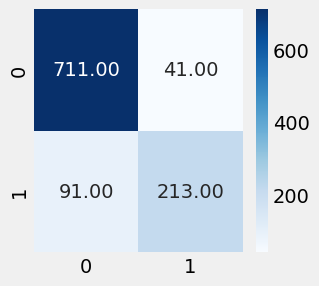

In [100]:
feature_selection2(18,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6145 - loss: 22.8822 - val_accuracy: 0.7446 - val_loss: 1.6161
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7498 - loss: 1.3587 - val_accuracy: 0.6026 - val_loss: 2.0491
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7563 - loss: 1.3282 - val_accuracy: 0.7758 - val_loss: 1.1496
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7662 - loss: 0.8091 - val_accuracy: 0.6036 - val_loss: 1.7172
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7787 - loss: 0.6817 - val_accuracy: 0.7417 - val_loss: 2.2499
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7488 - loss: 1.9676 - val_accuracy: 0.7152 - val_loss: 0.6616
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7958 - loss: 0.6113 - val_accuracy: 0.8269 - val_loss: 0.4797
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8071 - loss: 0.4951 - val_accuracy: 0

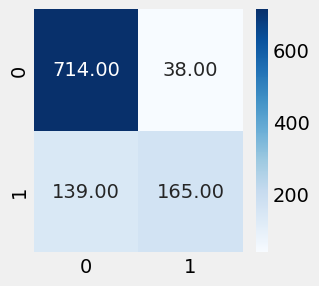

In [101]:
feature_selection2(15,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7045 - loss: 12.3827 - val_accuracy: 0.7010 - val_loss: 0.4626
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 0.6070 - val_accuracy: 0.7824 - val_loss: 0.5296
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7606 - loss: 0.6184 - val_accuracy: 0.7919 - val_loss: 0.6757
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.5517 - val_accuracy: 0.8515 - val_loss: 0.3747
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8094 - loss: 0.5104 - val_accuracy: 0.8553 - val_loss: 0.3919
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8275 - loss: 0.5109 - val_accuracy: 0.8817 - val_loss: 0.3463
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.4515 - val_accuracy: 0.4891 - val_loss: 2.0741
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.7341 - val_accuracy: 0

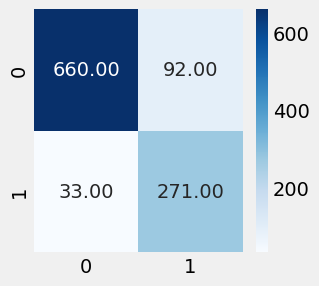

In [102]:
feature_selection2(12,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7112 - loss: 0.7009 - val_accuracy: 0.8127 - val_loss: 0.4137
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8132 - loss: 0.4213 - val_accuracy: 0.8486 - val_loss: 0.3724
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8362 - loss: 0.3716 - val_accuracy: 0.8619 - val_loss: 0.3363
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3426 - val_accuracy: 0.8846 - val_loss: 0.3068
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8782 - loss: 0.3150 - val_accuracy: 0.8931 - val_loss: 0.2873
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3101 - val_accuracy: 0.8950 - val_loss: 0.2728
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.2893 - val_accuracy: 0.8959 - val_loss: 0.2595
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.2728 - val_accuracy: 0.

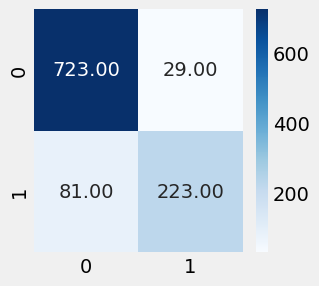

In [103]:
feature_selection2(9,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7137 - loss: 1.7418 - val_accuracy: 0.7994 - val_loss: 0.4368
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8027 - loss: 0.4259 - val_accuracy: 0.8609 - val_loss: 0.3532
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3545 - val_accuracy: 0.8704 - val_loss: 0.3195
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3220 - val_accuracy: 0.8827 - val_loss: 0.2869
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8649 - loss: 0.2992 - val_accuracy: 0.7928 - val_loss: 0.3909
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8537 - loss: 0.3272 - val_accuracy: 0.8997 - val_loss: 0.2612
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8823 - loss: 0.2690 - val_accuracy: 0.9035 - val_loss: 0.2470
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8865 - loss: 0.2609 - val_accuracy: 0.

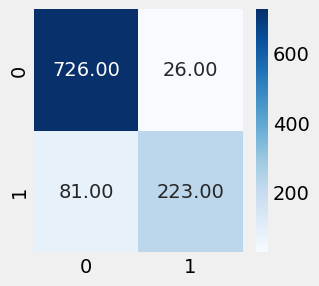

In [104]:
feature_selection2(6,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7388 - loss: 0.7633 - val_accuracy: 0.7304 - val_loss: 0.5673
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7434 - loss: 0.5142 - val_accuracy: 0.7304 - val_loss: 0.4450
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7306 - loss: 0.4327 - val_accuracy: 0.7304 - val_loss: 0.4023
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7374 - loss: 0.4279 - val_accuracy: 0.7304 - val_loss: 0.3716
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7386 - loss: 0.3658 - val_accuracy: 0.9177 - val_loss: 0.3689
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3492 - val_accuracy: 0.9073 - val_loss: 0.3230
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8761 - loss: 0.3189 - val_accuracy: 0.7805 - val_loss: 0.4143
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7436 - loss: 0.5300 - val_accuracy: 0.

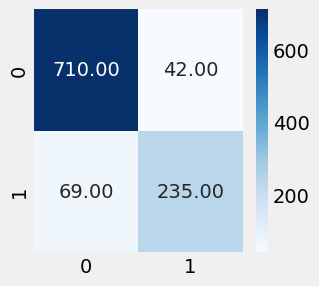

In [105]:
feature_selection2(3,df)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6763 - loss: 0.6308 - val_accuracy: 0.7304 - val_loss: 0.4819
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7357 - loss: 0.4697 - val_accuracy: 0.7304 - val_loss: 0.4573
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - loss: 0.4600 - val_accuracy: 0.7304 - val_loss: 0.4565
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7329 - loss: 0.4515 - val_accuracy: 0.7304 - val_loss: 0.4570
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7450 - loss: 0.4594 - val_accuracy: 0.7304 - val_loss: 0.4575
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7479 - loss: 0.4386 - val_accuracy: 0.7304 - val_loss: 0.4582
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.4448 - val_accuracy: 0.7304 - val_loss: 0.4575
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.4517 - val_accuracy: 0.

C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

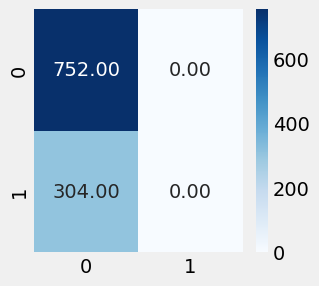

In [106]:
feature_selection2(2,df)